Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [201]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [202]:
Npx = 3 # Number of plaquette in each dimension
Npy = 4
model = site.SitesOBC(Npx, Npy)

In [203]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 38
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
7
8
5
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A'
 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B'
 'A' 'B']


In [204]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]]


In [205]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
(5, 0)


In [206]:
9 % 2

1

In [ ]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds, _, _ = model.get_anyonbonds()

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
first row
id 5 idx 5 idy 0
first row
id 6 idx 6 idy 0
odd row
id 7 idx 0 idy 1
odd row
id 8 idx 1 idy 1
odd row
id 9 idx 2 idy 1
odd row
id 10 idx 3 idy 1
odd row
id 11 idx 4 idy 1
odd row
id 12 idx 5 idy 1
odd row
id 13 idx 6 idy 1
odd row
id 14 idx 7 idy 1
even row
id 15 idx 0 idy 2
even row
id 16 idx 1 idy 2
even row
id 17 idx 2 idy 2
even row
id 18 idx 3 idy 2
even row
id 19 idx 4 idy 2
even row
id 20 idx 5 idy 2
even row
id 21 idx 6 idy 2
even row
id 22 idx 7 idy 2
odd row
id 23 idx 0 idy 3
odd row
id 24 idx 1 idy 3
odd row
id 25 idx 2 idy 3
odd row
id 26 idx 3 idy 3
odd row
id 27 idx 4 idy 3
odd row
id 28 idx 5 idy 3
odd row
id 29 idx 6 idy 3
odd row
id 30 idx 7 idy 3
last row
id 31 idx 0 idy 4
last row
id 32 idx 1 idy 4
last row
id 33 idx 2 idy 4
last row
id 34 idx 3 idy 4
last row
id 35 idx 4 idy 4
last row
id 36 idx 5 idy 4


AttributeError: 'SitesOBC' object has no attribute 'anyon_bondlist'

In [194]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 8  9]
 [10 11]
 [12 13]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [24 25]
 [26 27]
 [28 29]
 [32 33]
 [34 35]
 [36 37]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]
 [12 11]
 [14 13]
 [17 16]
 [19 18]
 [21 20]
 [24 23]
 [26 25]
 [28 27]
 [30 29]
 [32 31]
 [34 33]
 [36 35]]
zz_bond:  [[ 0  7]
 [ 2  9]
 [ 4 11]
 [ 6 13]
 [ 8 16]
 [10 18]
 [12 20]
 [14 22]
 [15 23]
 [17 25]
 [19 27]
 [21 29]
 [24 31]
 [26 33]
 [28 35]
 [30 37]]
diagonal_bonds:  [[ 0  9]
 [ 2 11]
 [ 4 13]
 [ 8 18]
 [10 20]
 [12 22]
 [15 25]
 [17 27]
 [19 29]
 [24 33]
 [26 35]
 [28 37]]


In [148]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


In [ ]:
def plot_honeycomb(model, highlight_idxidy=None, highlight_color='orange', plot_anyon_bonds=False):
    coords = model.get_coordinates()
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    plt.figure(figsize=(25, 25))
    # Plot sites
    plt.scatter(coords[:, 0], coords[:, 1], color='k', zorder=3)

    # Plot bonds
    for bond in xx_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'r-', label='xx' if bond == xx_bondlist[0] else "", lw=2)
    for bond in yy_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'b-', label='yy' if bond == yy_bondlist[0] else "", lw=2)
    for bond in zz_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'g-', label='zz' if bond == zz_bondlist[0] else "", lw=2)

    # Plot anyon bonds if requested
    if plot_anyon_bonds:
        anyon_bonds = model.get_anyonbonds()
        for i, j in anyon_bonds:
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]],
                     color='magenta', lw=5, label='anyon bond' if (i, j) == anyon_bonds[0] else "", zorder=4)

    # Highlight a specific site if requested
    if highlight_idxidy is not None:
        idx, idy = highlight_idxidy
        site_id = model.idxidy_to_id(idx, idy)
        plt.scatter(coords[site_id, 0], coords[site_id, 1], color=highlight_color, s=300, zorder=5, label='highlighted site')
    
    plt.axis('equal')
    plt.axis('off')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
x 7.794228634059947 y 0.5
id 10 idx 10 idy 0
x 8.660254037844386 y -0.0
id 11 idx 11 idy 0
x 9.526279441628825 y 0.5
id 12 idx 12 idy 0
x 10.392304845413264 y -0.0
id 13 idx 13 idy 0
x 11.258330249197702 y 0.5
id 14 idx 14 idy 0
x 12.12435565298214 y -0.0
id 15 idx 15 idy 0
x 12.990381056766578 y 0.5
id 16 idx 16 idy 0
x 13.856406460551018 y -0.0
id 17 idx 17 idy 0
x 14.722431864335457 y 0.5
id 18 idx 18 idy 0
x 15.588457268119894 y -0.0
id 19 idx 19 idy 0
x 16.454482671904334 y 0.5
id 20 idx 20 idy 0
x 17.32050807568877 y -0.0
id 21 idx 21 idy 0
x 18.186533479473212 y 0.5
id 22 idx 22 idy 0
x 19

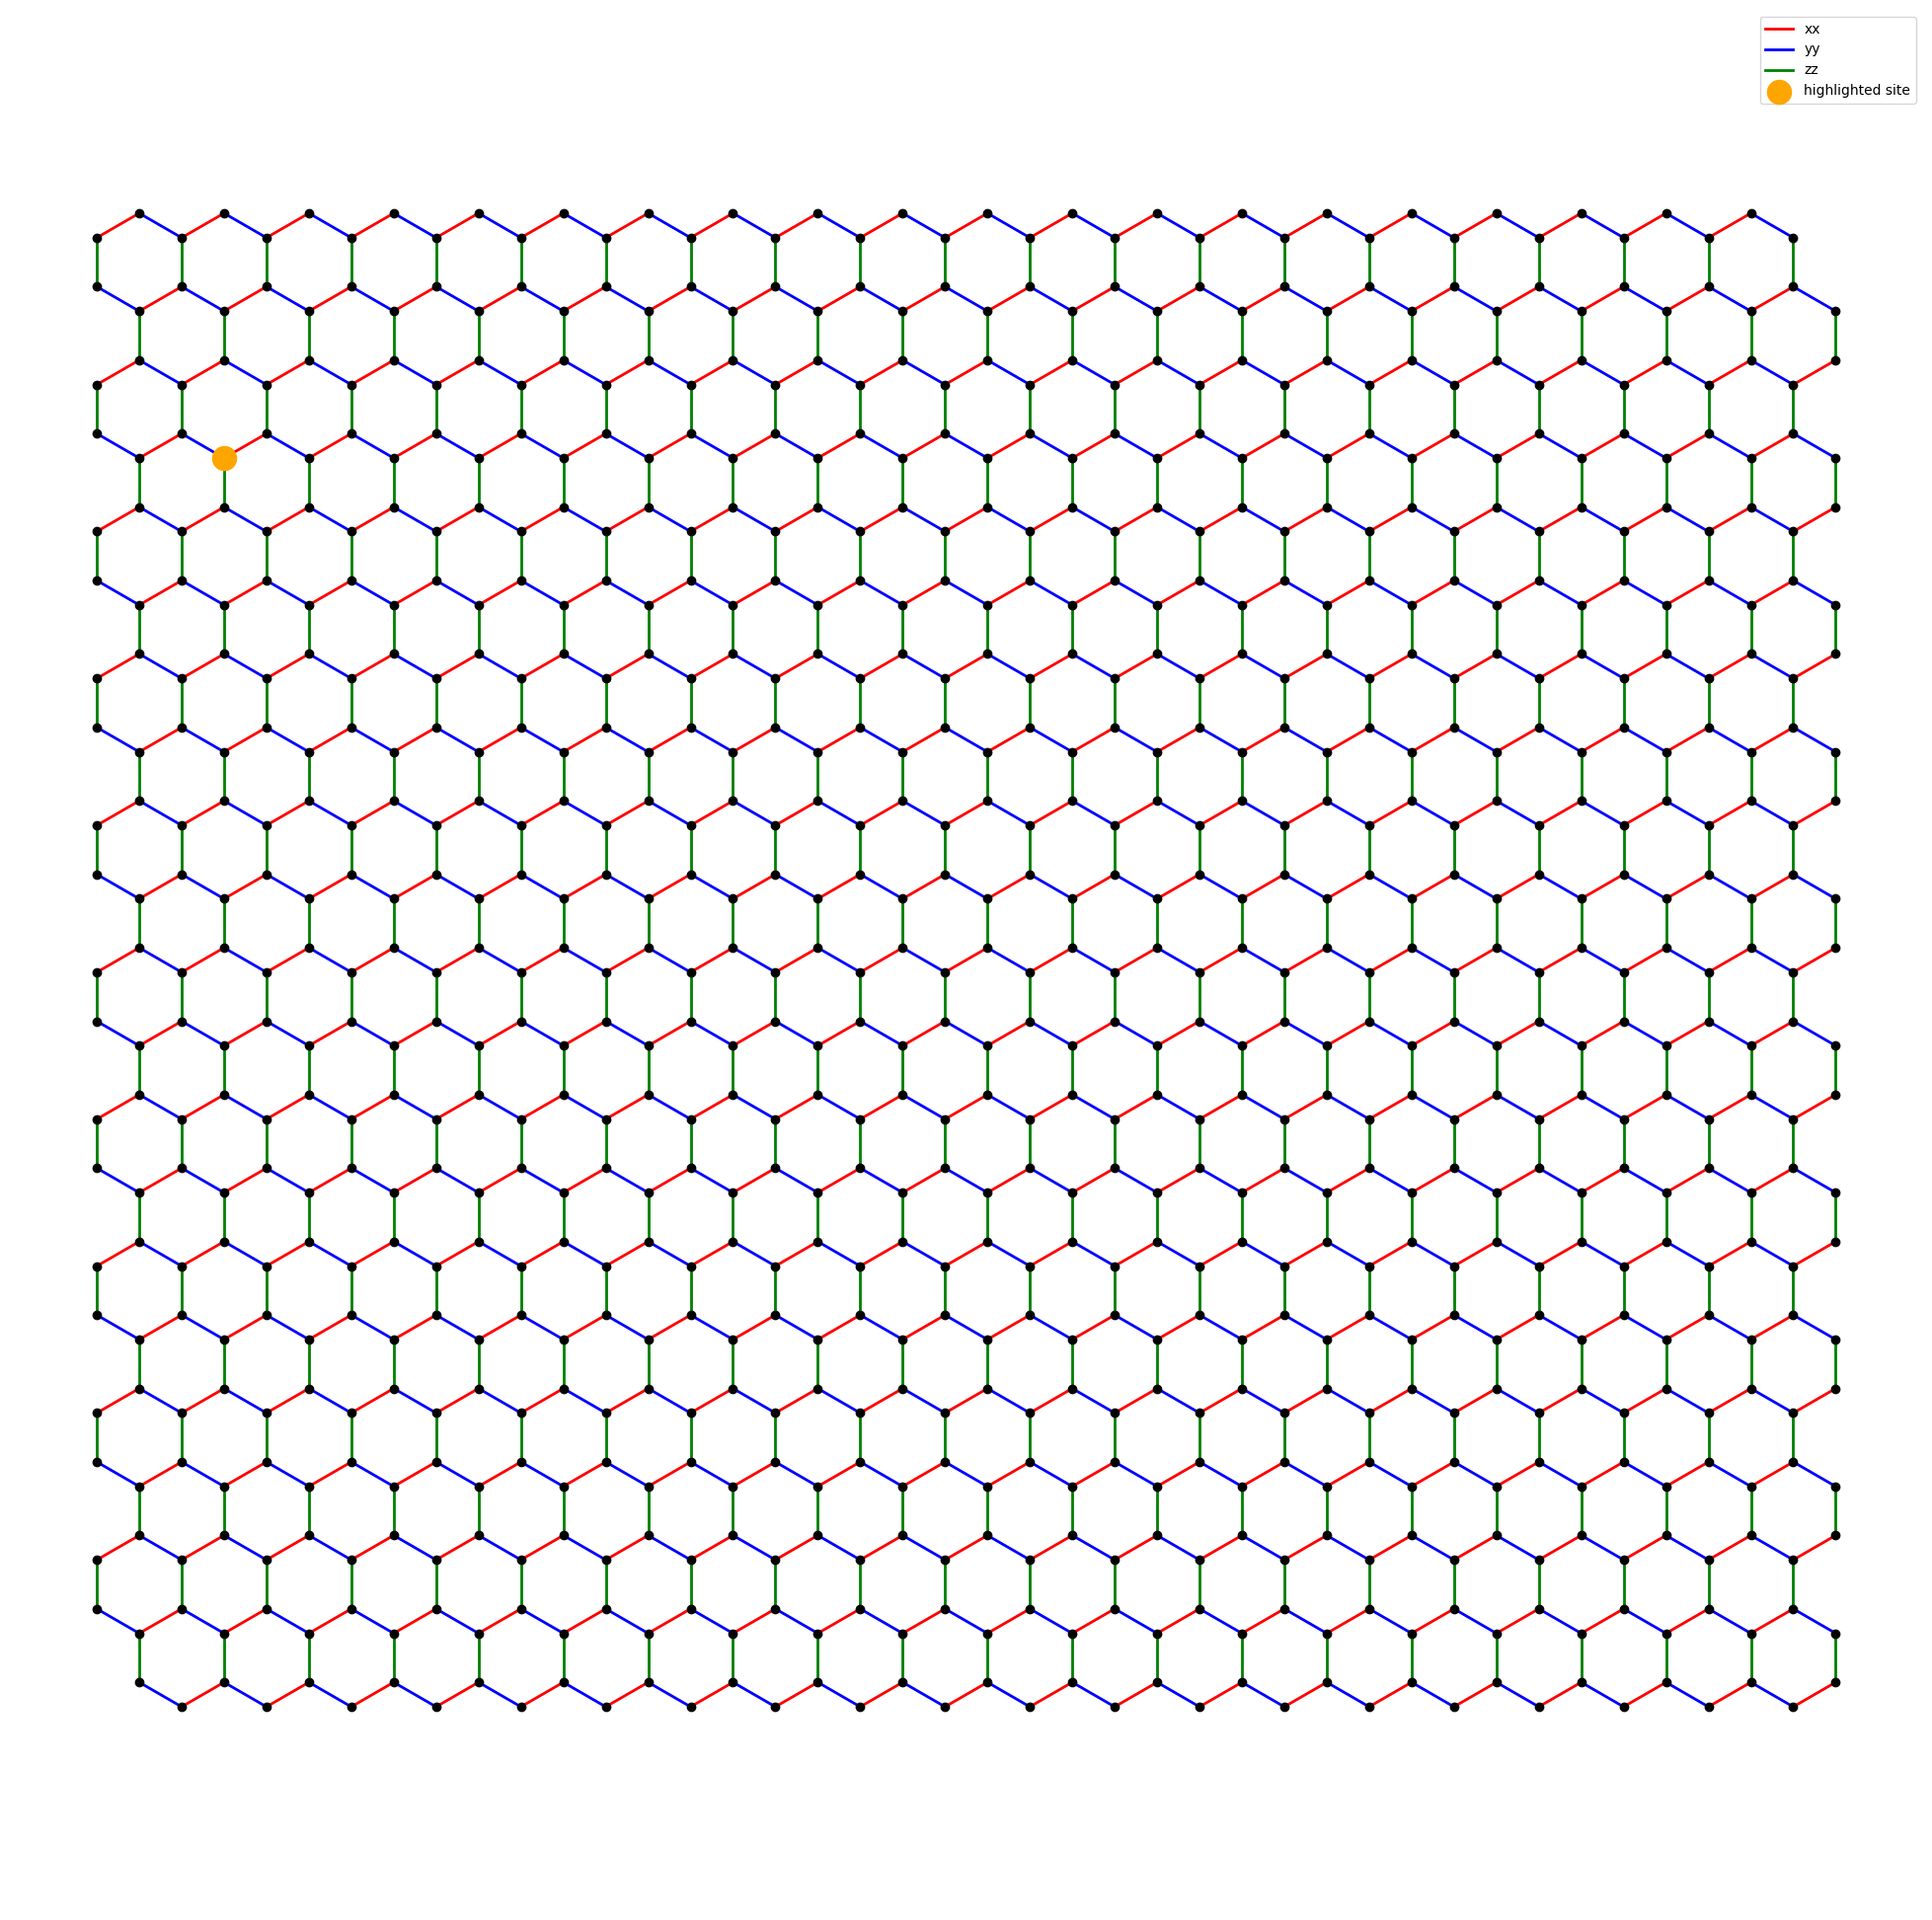

In [198]:
modell = site.SitesOBC(Npx = 20, Npy = 20)
plot_honeycomb(modell, (3,3))

In [104]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 0 idy 1
x 0.0 y -1.0
id 6 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 7 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 8 idx 3 idy 1
x 2.598076211353316 y -1.5
id 9 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 10 idx 5 idy 1
x 4.330127018922193 y -1.5
id 11 idx 0 idy 2
x 0.0 y -3.0
id 12 idx 1 idy 2
x 0.8660254037844386 y -2.5
id 13 idx 2 idy 2
x 1.7320508075688772 y -3.0
id 14 idx 3 idy 2
x 2.598076211353316 y -2.5
id 15 idx 4 idy 2
x 3.4641016151377544 y -3.0
id 16 idx 5 idy 2
x 4.330127018922193 y -2.5
id 17 idx 0 idy 3
x 0.0 y -4.0
id 18 idx 1 idy 3
x 0.8660254037844386 y -4.5
id 19 idx 2 idy 3
x 1.7320508075688772 y -4.0
id 20 idx 3 idy 3
x 2.598076211353316 y -4.5
id 21 idx 4 idy 3
x 3.4641016151377544 y -4.0
id 22 idx 5 idy 3
x 4.330127018922193 y -4.5
id 23 idx 0 idy 4
x 0

In [195]:
3//2 

1